# Exploratory analysis of Enron data

The task here is explore the enron dataset to get a feel of the data. We should take a rough look at the different features to get their types, and some descriptive statistics from them.

Also we should see if we can take out some outliers from the dataset.

Lets start by loading the dataset to a dict and printing its keys

In [52]:
import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
### Load the dataset and make it a dict (easy since it's a pickle):
dataset = '/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/final_project_dataset.pkl'
data_dict = pickle.load(open(dataset, "r") )

### Check keys of the data_dict
pprint.pprint(data_dict.keys()[0:10])

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F']


It looks like the keys are the names of each person in the dataset. Lets continue exploring the data by printing each key of a certain person.

In [53]:
print 'Feature types:\n'
for key, value in data_dict.itervalues().next().iteritems():
    print key,type(value)

Feature types:

salary <type 'int'>
to_messages <type 'int'>
deferral_payments <type 'str'>
total_payments <type 'int'>
exercised_stock_options <type 'str'>
bonus <type 'int'>
restricted_stock <type 'int'>
shared_receipt_with_poi <type 'int'>
restricted_stock_deferred <type 'str'>
total_stock_value <type 'int'>
expenses <type 'int'>
loan_advances <type 'str'>
from_messages <type 'int'>
other <type 'int'>
from_this_person_to_poi <type 'int'>
poi <type 'bool'>
director_fees <type 'str'>
deferred_income <type 'str'>
long_term_incentive <type 'str'>
email_address <type 'str'>
from_poi_to_this_person <type 'int'>


Lets format the data a bit so we can explore it easier.

In [62]:
import sys
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/ud120-projects/tools')
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/')
from preprocess import *
from feature_format import featureFormat, targetFeatureSplit
features_list = getallFeatures(data_dict)
### Extract features and labels from dataset for local testing
data = featureFormat(data_dict, features_list, sort_keys = True)
print '[(name, max, min, mean)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  data.mean(axis=0)))

[(name, max, min, mean)]
[('poi', 1.0, 0.0, 0.125),
 ('salary', 1111258.0, 0.0, 185446.03472222222),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557),
 ('deferral_payments', 6426990.0, -102500.0, 222089.55555555556),
 ('total_payments', 103559793.0, 0.0, 2259057.125),
 ('exercised_stock_options', 34348384.0, 0.0, 2075801.9791666667),
 ('bonus', 8000000.0, 0.0, 675997.35416666663),
 ('restricted_stock', 14761694.0, -2604490.0, 868536.29166666663),
 ('shared_receipt_with_poi', 5521.0, 0.0, 702.61111111111109),
 ('restricted_stock_deferred', 15456290.0, -1787380.0, 73417.902777777781),
 ('total_stock_value', 49110078.0, -44093.0, 2909785.611111111),
 ('expenses', 228763.0, 0.0, 35375.340277777781),
 ('loan_advances', 81525000.0, 0.0, 582812.5),
 ('from_messages', 14368.0, 0.0, 363.58333333333331),
 ('other', 10359729.0, 0.0, 297260.09027777775),
 ('from_this_person_to_poi', 609.0, 0.0, 24.625),
 ('director_fees', 137864.0, 0.0, 9980.3194444444453),
 ('deferred_income', 0.0, -3504386.0, 

The max-values of each of these variables are massive. This is due to the fact that one of the keys in data_dict are mapped to the person 'TOTAL', which is of course an outlier. Lets also drop poi from the data as it is the dependant variable.

In [63]:
data_dict.pop('TOTAL', None)

data = featureFormat(data_dict, features_list, sort_keys = True)
print data[0]
features_list.remove('poi')
data = np.delete(data, 0, 1)
print data[0]
print '[(name, max, min, mean)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  data.mean(axis=0)))

[  0.00000000e+00   2.01955000e+05   2.90200000e+03   2.86971700e+06
   4.48444200e+06   1.72954100e+06   4.17500000e+06   1.26027000e+05
   1.40700000e+03  -1.26027000e+05   1.72954100e+06   1.38680000e+04
   0.00000000e+00   2.19500000e+03   1.52000000e+02   6.50000000e+01
   0.00000000e+00  -3.08105500e+06   3.04805000e+05   4.70000000e+01]
[  2.01955000e+05   2.90200000e+03   2.86971700e+06   4.48444200e+06
   1.72954100e+06   4.17500000e+06   1.26027000e+05   1.40700000e+03
  -1.26027000e+05   1.72954100e+06   1.38680000e+04   0.00000000e+00
   2.19500000e+03   1.52000000e+02   6.50000000e+01   0.00000000e+00
  -3.08105500e+06   3.04805000e+05   4.70000000e+01]
[(name, max, min, mean)]
[('salary', 1111258.0, 0.0, 185446.03472222222),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557),
 ('deferral_payments', 6426990.0, -102500.0, 222089.55555555556),
 ('total_payments', 103559793.0, 0.0, 2259057.125),
 ('exercised_stock_options', 34348384.0, 0.0, 2075801.9791666667),
 ('bonus', 800

The max-values are now quite a bit more reasonable. Lets now add median and std to the table:

In [64]:
print '[(name, max, min, mean, median, std)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  np.mean(data, axis=0), np.median(data, axis=0), np.std(data, axis=0)))

[(name, max, min, mean, median, std)]
[('salary', 1111258.0, 0.0, 185446.03472222222, 210596.0, 196356.75782139692),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557, 347.5, 2229.7819580055161),
 ('deferral_payments',
  6426990.0,
  -102500.0,
  222089.55555555556,
  0.0,
  751478.33357818064),
 ('total_payments',
  103559793.0,
  0.0,
  2259057.125,
  941359.5,
  8815823.5265710335),
 ('exercised_stock_options',
  34348384.0,
  0.0,
  2075801.9791666667,
  608293.5,
  4778833.0489782216),
 ('bonus', 8000000.0, 0.0, 675997.35416666663, 300000.0, 1228866.007269375),
 ('restricted_stock',
  14761694.0,
  -2604490.0,
  868536.29166666663,
  360528.0,
  2009558.2026330493),
 ('shared_receipt_with_poi',
  5521.0,
  0.0,
  702.61111111111109,
  114.0,
  1073.543626598321),
 ('restricted_stock_deferred',
  15456290.0,
  -1787380.0,
  73417.902777777781,
  0.0,
  1297454.7387758635),
 ('total_stock_value',
  49110078.0,
  -44093.0,
  2909785.611111111,
  965955.0,
  6167490.9904278889),
 ('ex

Lets plot these features to see how the descriptive stats really look like. Before doing this, lets normalize each feature in order to not distort the visualization.

The normalization function will be the following:
$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}

In [65]:
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
data_normal = (data-mins)/(maxs-mins)
print np.mean(data_normal, axis=0)

[ 0.16687937  0.08175824  0.04971132  0.02181404  0.06043376  0.08449967
  0.19998788  0.12726157  0.10791194  0.06009416  0.15463751  0.00714888
  0.02530508  0.02869381  0.04043514  0.0723925   0.94473118  0.06548677
  0.0734033 ]


After normalizing the data, lets make it a pandas dataframe

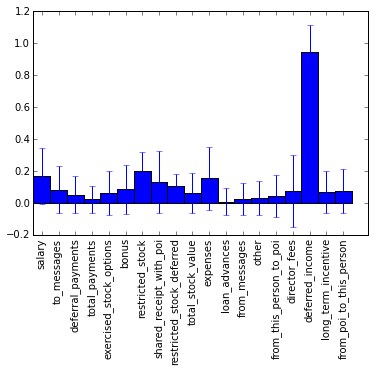

In [67]:
plt.figure()
plt.bar(np.arange(19), np.mean(data_normal, axis=0), 1,
        yerr=np.std(data_normal, axis=0))
plt.xticks(np.arange(0.5, 19, 1), features_list, rotation=90)
plt.show()